# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv('charts.csv', encoding='utf-8')


In [3]:
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [4]:
distinct_regions = df['region'].unique()

# Create a DataFrame with distinct regions
distinct_regions_df = pd.DataFrame({'Region': distinct_regions})

# Save the DataFrame to an Excel file
distinct_regions_df.to_excel('distinct_regions.xlsx', index=False)

print("Distinct regions saved to 'distinct_regions.xlsx'")

Distinct regions saved to 'distinct_regions.xlsx'


In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB
None


# Data Cleaning

In [5]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64


In [6]:
# Convert 'title' column to string
df['title'] = df['title'].astype(str)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' handles any conversion errors by setting them as NaT

# Convert 'artist' column to string
df['artist'] = df['artist'].astype(str)

# Convert 'region' column to string
df['region'] = df['region'].astype(str)

# Convert 'trend' column to string
df['trend'] = df['trend'].astype(str)

# Display basic information about the dataset after conversions
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   url      object        
 5   region   object        
 6   chart    object        
 7   trend    object        
 8   streams  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ GB
None


In [7]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Descriptive Analysis

In [8]:
# Descriptive Analysis
# Summary statistics
print(df.describe())

               rank                           date       streams          year
count  2.617351e+07                       26173514  2.032190e+07  2.617351e+07
mean   8.092314e+01  2019-08-20 15:35:30.458598912  5.526131e+04  2.019135e+03
min    1.000000e+00            2017-01-01 00:00:00  1.001000e+03  2.017000e+03
25%    2.900000e+01            2018-06-16 00:00:00  3.546000e+03  2.018000e+03
50%    6.700000e+01            2019-09-18 00:00:00  9.565000e+03  2.019000e+03
75%    1.310000e+02            2020-11-11 00:00:00  3.540900e+04  2.020000e+03
max    2.000000e+02            2021-12-31 00:00:00  1.974970e+07  2.021000e+03
std    5.918601e+01                            NaN  2.095872e+05  1.390380e+00


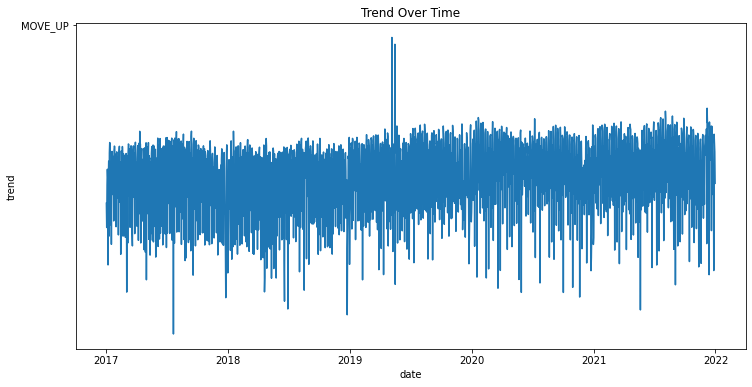

In [9]:
# Visualizations
# Time series plot of trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trend', data=df, errorbar=None)
plt.title('Trend Over Time')
plt.show()

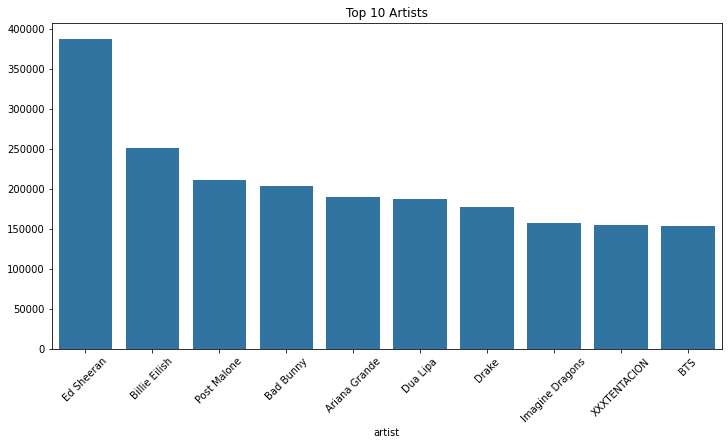

In [10]:
# Bar chart of top artists
top_artists = df['artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists')
plt.xticks(rotation=45)
plt.show()

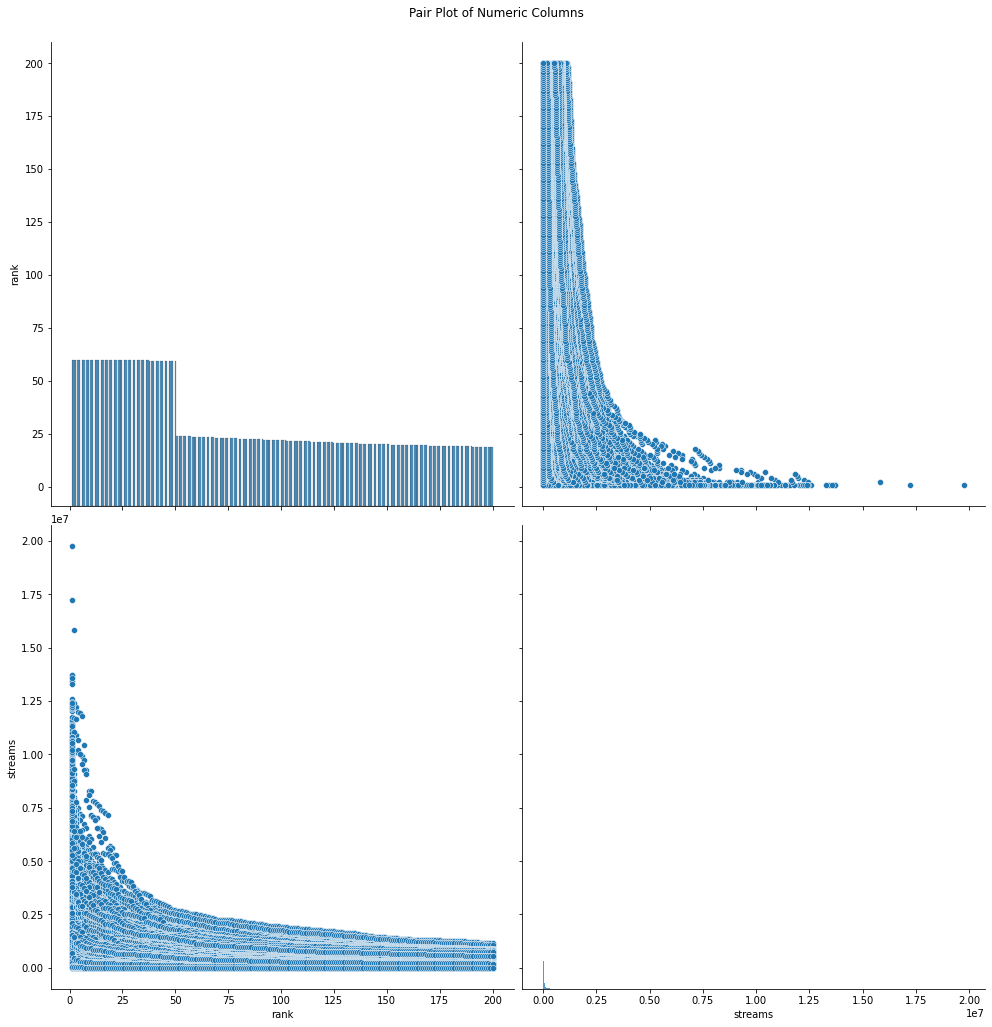

In [11]:
# Pair plot of numeric columns with increased size
sns.pairplot(df[['rank', 'trend', 'streams']], height=7)
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

# Diagnostic Analysis

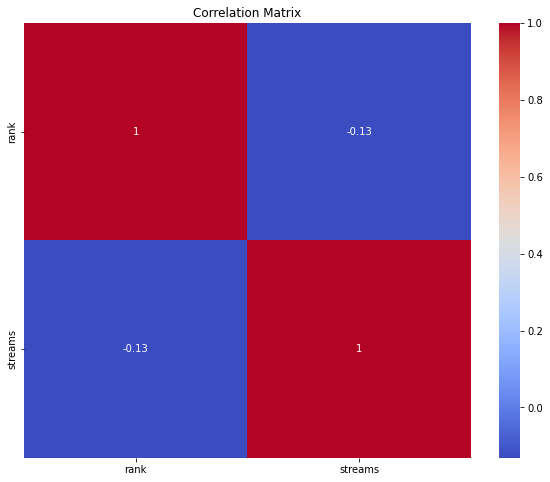

In [12]:
# Exclude non-numeric columns when calculating the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix with increased size
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

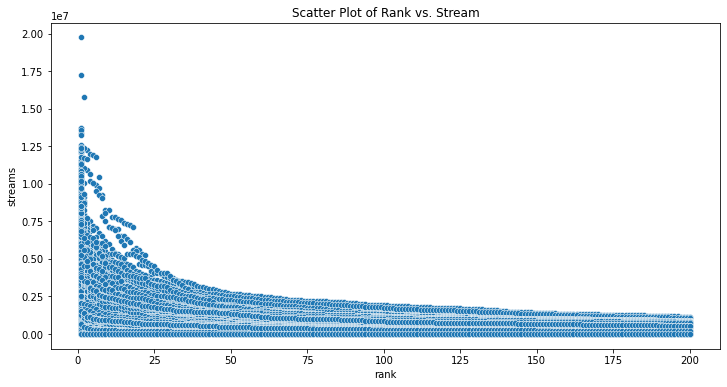

In [13]:
# Scatter plot of rank vs. stream
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rank', y='streams', data=df)
plt.title('Scatter Plot of Rank vs. Stream')
plt.show()

# Prescriptive Analysis

In [14]:
# Prescriptive Analysis
# Identify songs with the highest streams
top_streams = df.sort_values(by='streams', ascending=False).head(10)
print(top_streams[['title', 'artist', 'streams']])

                                    title          artist     streams
22999369                       Easy On Me           Adele  19749704.0
17849245  All I Want for Christmas Is You    Mariah Carey  17223237.0
17849246                   Last Christmas           Wham!  15813799.0
16687378                  drivers license  Olivia Rodrigo  13714177.0
16564161                  drivers license  Olivia Rodrigo  13701177.0
16469259                  drivers license  Olivia Rodrigo  13628143.0
17931746  All I Want for Christmas Is You    Mariah Carey  13573228.0
16329756                  drivers license  Olivia Rodrigo  13412192.0
23069513                       Easy On Me           Adele  13271124.0
20265983                         good 4 u  Olivia Rodrigo  12586645.0


# Exploratory Data Analysis

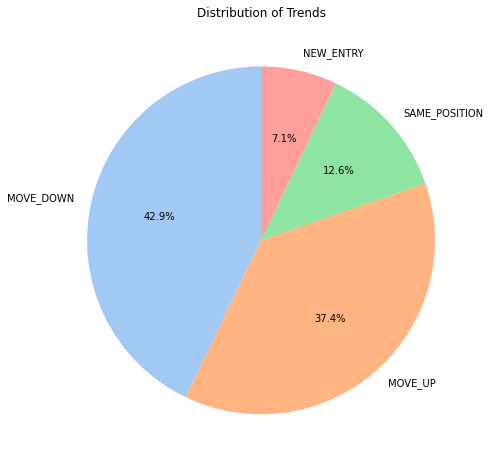

In [15]:
# Pie chart of trend
plt.figure(figsize=(8, 8))
trend_counts = df['trend'].value_counts()
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Trends')
plt.show()

<ipython-input-16-e09e719d647b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chart_counts.index, y=chart_counts.values, palette='viridis')


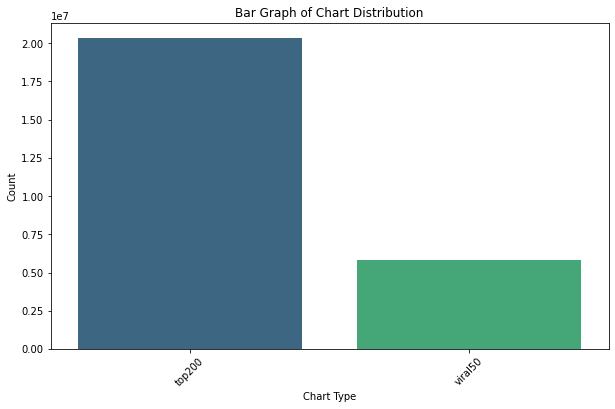

In [16]:
# Bar graph of chart
plt.figure(figsize=(10, 6))
chart_counts = df['chart'].value_counts()
sns.barplot(x=chart_counts.index, y=chart_counts.values, palette='viridis')
plt.title('Bar Graph of Chart Distribution')
plt.xlabel('Chart Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

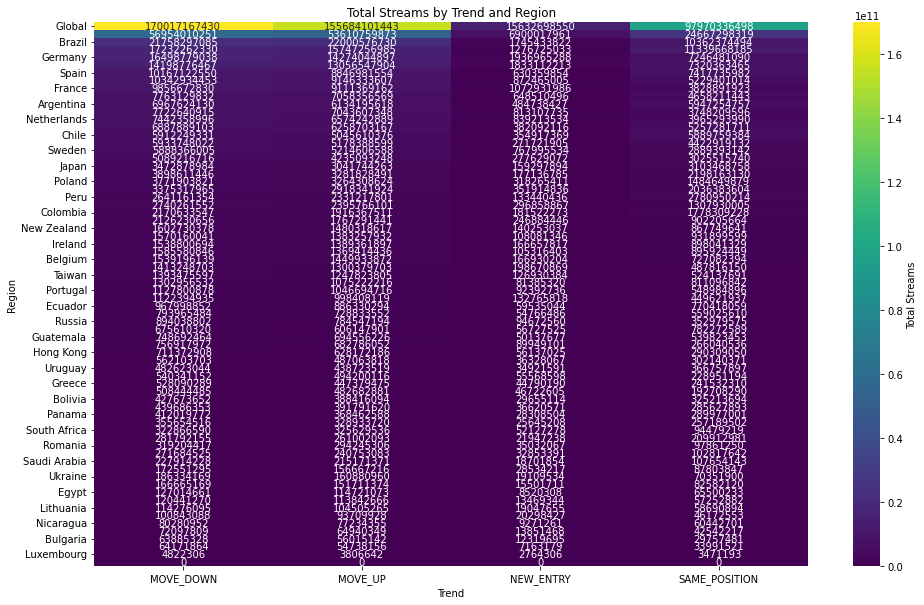

In [17]:
# Group by 'trend' and 'region' and summing up the 'streams' for each combination
trend_region_streams_group = df.groupby(['trend', 'region'])['streams'].sum().reset_index()

# Pivot the DataFrame for better visualization
pivot_df = trend_region_streams_group.pivot(index='region', columns='trend', values='streams')

# Sort the DataFrame by total streams in descending order
sorted_regions = trend_region_streams_group.groupby('region')['streams'].sum().sort_values(ascending=False).index
pivot_df = pivot_df.reindex(sorted_regions)

# Heatmap of total streams for each trend and region
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Total Streams'})
plt.title('Total Streams by Trend and Region')
plt.xlabel('Trend')
plt.ylabel('Region')
plt.show()

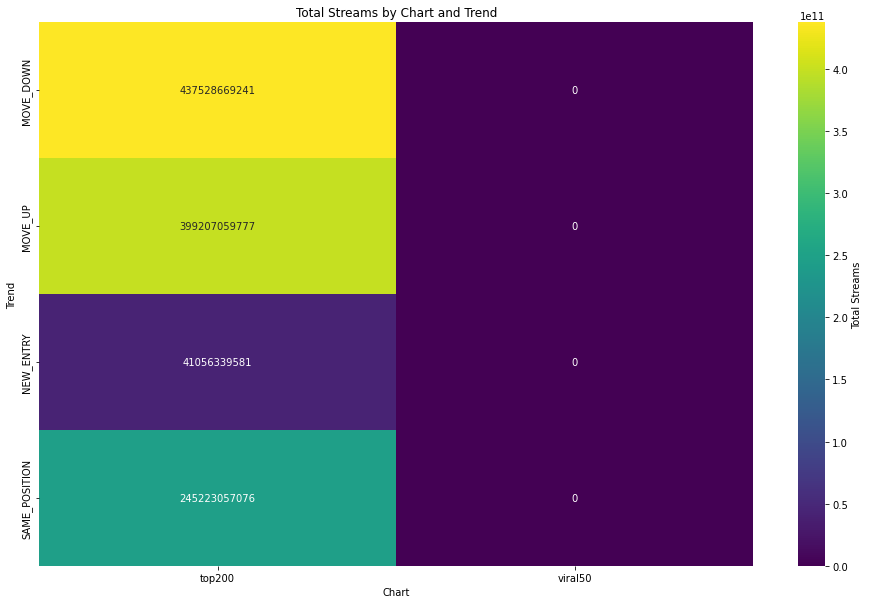

In [19]:
# Group by 'chart' and 'trend' and summing up the 'streams' for each combination
chart_trend_streams_group = df.groupby(['chart', 'trend'])['streams'].sum().reset_index()

# Pivot the DataFrame for better visualization
pivot_df = chart_trend_streams_group.pivot(index='trend', columns='chart', values='streams')

# Sort the DataFrame by total streams in descending order
sorted_charts = chart_trend_streams_group.groupby('chart')['streams'].sum().sort_values(ascending=False).index
pivot_df = pivot_df[sorted_charts]

# Heatmap of total streams for each chart and trend
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Total Streams'})
plt.title('Total Streams by Chart and Trend')
plt.xlabel('Chart')
plt.ylabel('Trend')
plt.show()

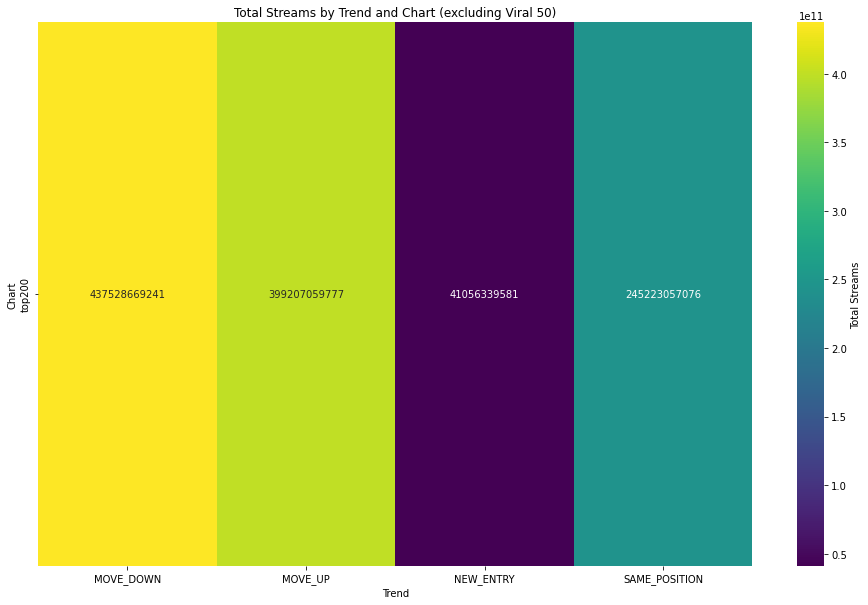

In [21]:
# Filter out 'Viral 50' from the DataFrame
filtered_df = chart_trend_streams_group[chart_trend_streams_group['chart'] != 'viral50']

# Pivot the filtered DataFrame for better visualization
pivot_df = filtered_df.pivot(index='chart', columns='trend', values='streams')

# Sort the DataFrame by total streams in descending order
sorted_charts = filtered_df.groupby('chart')['streams'].sum().sort_values(ascending=False).index
pivot_df = pivot_df.reindex(sorted_charts)

# Heatmap of total streams for each trend and chart
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Total Streams'})
plt.title('Total Streams by Trend and Chart (excluding Viral 50)')
plt.xlabel('Trend')
plt.ylabel('Chart')
plt.show()


<ipython-input-22-42f747dc78cf>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='trend', data=trend_streams_group, palette='muted', ci=None)
<ipython-input-22-42f747dc78cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='trend', data=trend_streams_group, palette='muted', ci=None)


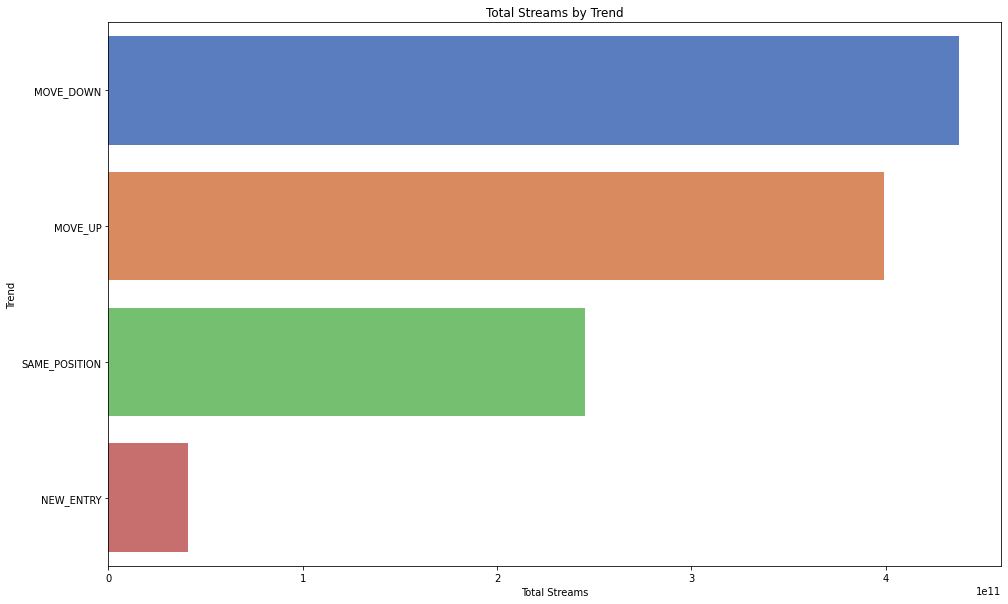

In [22]:
# Group by 'trend' and summing up the 'streams' for each trend
trend_streams_group = df.groupby('trend')['streams'].sum().reset_index()

# Sort the DataFrame by total streams in descending order
trend_streams_group = trend_streams_group.sort_values(by='streams', ascending=False)

# Bar plot of total streams for each trend with increased size
plt.figure(figsize=(16, 10))
sns.barplot(x='streams', y='trend', data=trend_streams_group, palette='muted', ci=None)
plt.title('Total Streams by Trend')
plt.xlabel('Total Streams')
plt.ylabel('Trend')
plt.show()

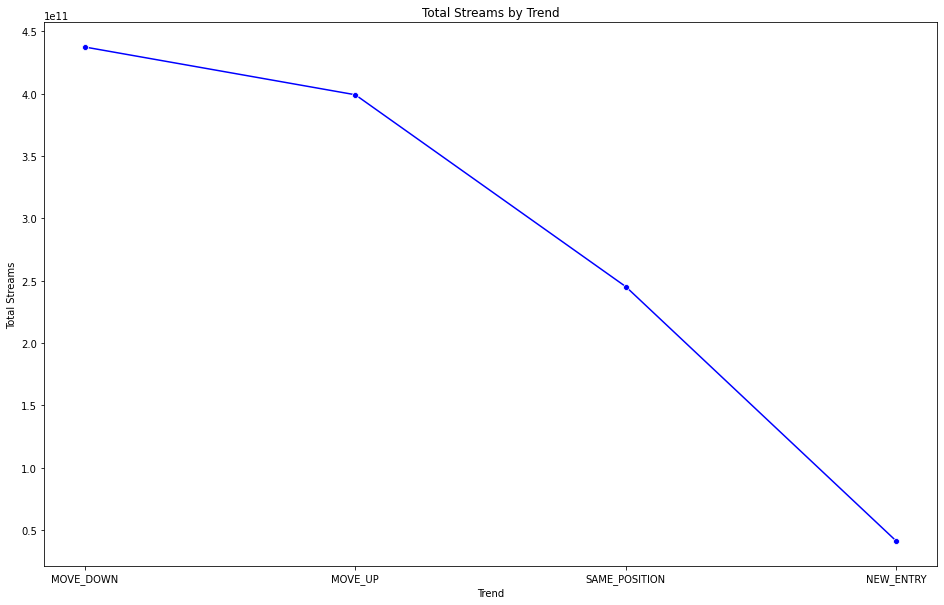

In [23]:
# Group by 'trend' and summing up the 'streams' for each trend
trend_streams_group = df.groupby('trend')['streams'].sum().reset_index()

# Sort the DataFrame by total streams in descending order
trend_streams_group = trend_streams_group.sort_values(by='streams', ascending=False)

# Line chart of total streams for each trend with increased size
plt.figure(figsize=(16, 10))
sns.lineplot(x='trend', y='streams', data=trend_streams_group, marker='o', color='b')
plt.title('Total Streams by Trend')
plt.xlabel('Trend')
plt.ylabel('Total Streams')
plt.show()

<ipython-input-7-2fe25510f68b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='streams', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-7-2fe25510f68b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='streams', data=df, estimator=sum, ci=None, palette='viridis')


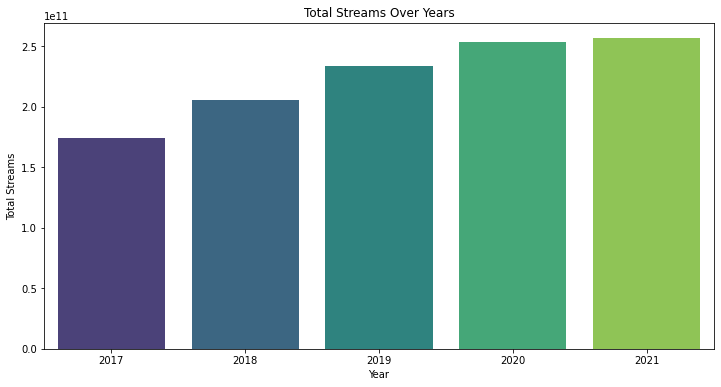

In [7]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Bar plot of streams over years
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='streams', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Streams Over Years')
plt.xlabel('Year')
plt.ylabel('Total Streams')
plt.show()

<ipython-input-25-67465bc3df06>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='region', data=region_streams_group, palette='muted', ci=None)
<ipython-input-25-67465bc3df06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='region', data=region_streams_group, palette='muted', ci=None)


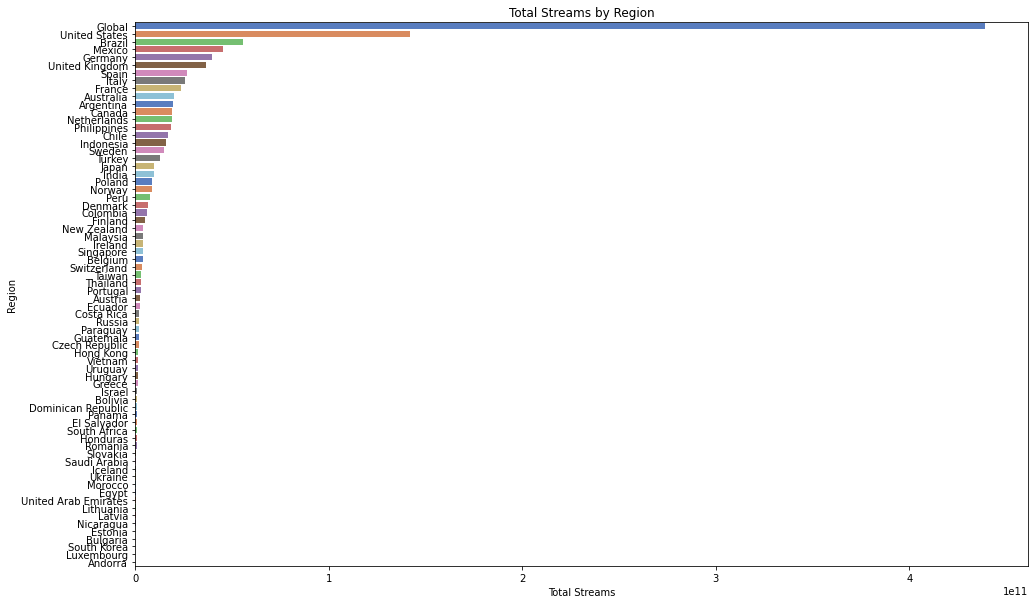

In [25]:
# Group by 'region' and summing up the 'streams' for each region
region_streams_group = df.groupby('region')['streams'].sum().reset_index()

# Sort the DataFrame by total streams in descending order
region_streams_group = region_streams_group.sort_values(by='streams', ascending=False)

# Bar plot of total streams for each region with increased size
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed
sns.barplot(x='streams', y='region', data=region_streams_group, palette='muted', ci=None)
plt.title('Total Streams by Region')
plt.xlabel('Total Streams')
plt.ylabel('Region')
plt.show()

<ipython-input-26-4884fcf3a77a>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='region', data=top5_regions, palette='muted', ci=None)
<ipython-input-26-4884fcf3a77a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='region', data=top5_regions, palette='muted', ci=None)


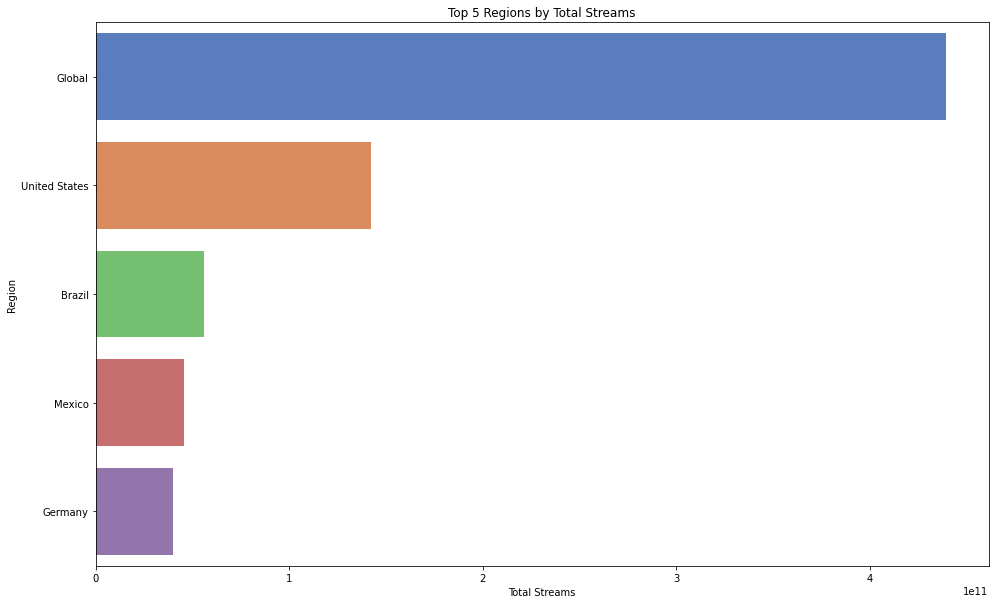

In [26]:
# Group by 'region' and summing up the 'streams' for each region
region_streams_group = df.groupby('region')['streams'].sum().reset_index()

# Sort the DataFrame by total streams in descending order
region_streams_group = region_streams_group.sort_values(by='streams', ascending=False)

# Select the top 5 regions
top5_regions = region_streams_group.head(5)

# Bar plot of total streams for the top 5 regions with increased size
plt.figure(figsize=(16, 10))
sns.barplot(x='streams', y='region', data=top5_regions, palette='muted', ci=None)
plt.title('Top 5 Regions by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Region')
plt.show()

<ipython-input-27-6164bf73bab4>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='chart', data=chart_streams_group, palette='muted', ci=None)
<ipython-input-27-6164bf73bab4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='chart', data=chart_streams_group, palette='muted', ci=None)


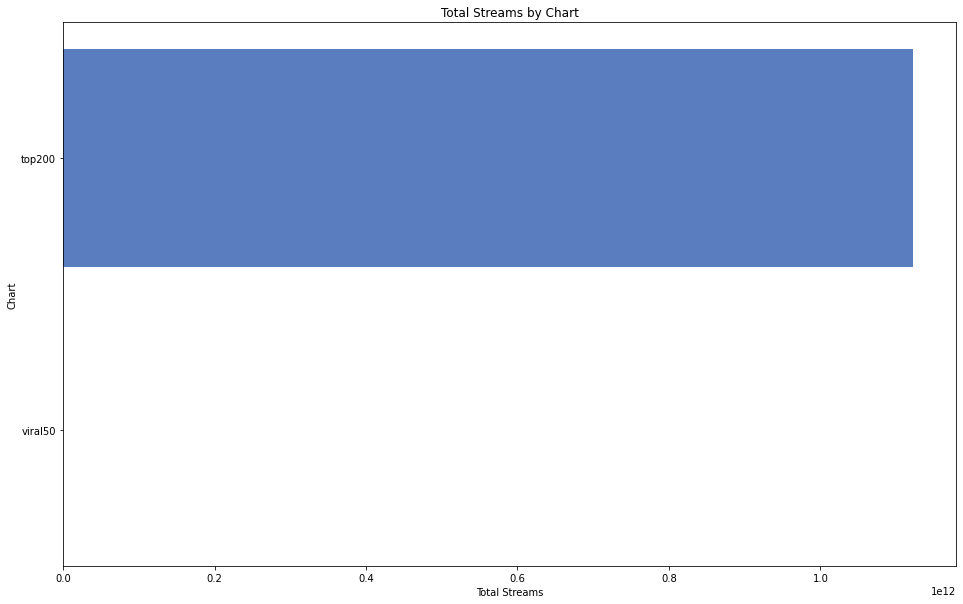

In [27]:
# Group by 'chart' and summing up the 'streams' for each chart
chart_streams_group = df.groupby('chart')['streams'].sum().reset_index()

# Sort the DataFrame by total streams in descending order
chart_streams_group = chart_streams_group.sort_values(by='streams', ascending=False)

# Bar plot of total streams for each chart with increased size
plt.figure(figsize=(16, 10))
sns.barplot(x='streams', y='chart', data=chart_streams_group, palette='muted', ci=None)
plt.title('Total Streams by Chart')
plt.xlabel('Total Streams')
plt.ylabel('Chart')
plt.show()

<ipython-input-29-9a67f14fce51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=sampled_data, palette='viridis')


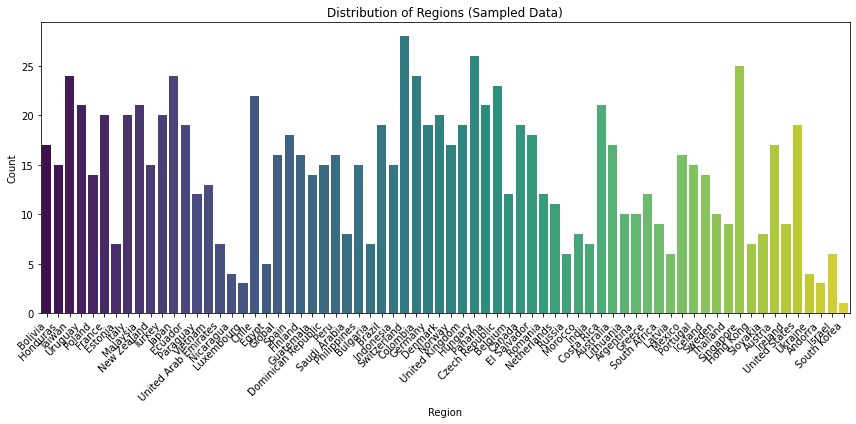

In [29]:
# Sample a subset of the data for visualization
sampled_data = df.sample(n=1000)  # Adjust the sample size as needed

# Countplot of the 'region' column with the sampled data
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=sampled_data, palette='viridis')
plt.title('Distribution of Regions (Sampled Data)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-30-eb246745aee6>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='artist', data=top_artists, palette='muted', ci=None)
<ipython-input-30-eb246745aee6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='artist', data=top_artists, palette='muted', ci=None)


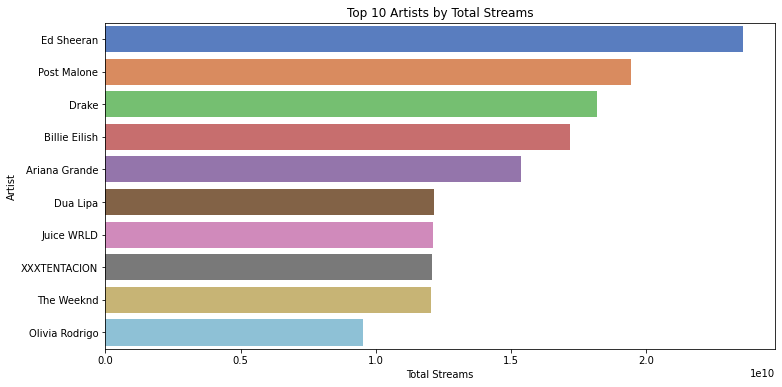

In [30]:
# Artist Analysis
top_artists = df.groupby('artist')['streams'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y='artist', data=top_artists, palette='muted', ci=None)
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()

In [31]:
# URL Analysis
unique_urls = df['url'].nunique()
print(f'Number of Unique URLs: {unique_urls}')

Number of Unique URLs: 217704


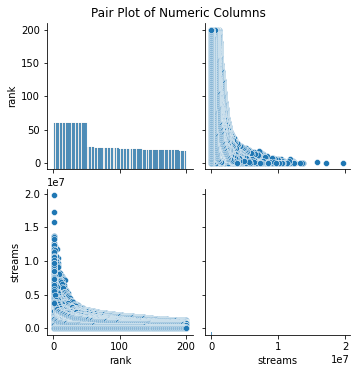

In [32]:
# Numeric Correlation
sns.pairplot(df[['rank', 'streams']])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

<ipython-input-33-df02aa19f919>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='streams', y='region', data=region_streams_group.head(5), palette='muted', ci=None)
<ipython-input-33-df02aa19f919>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='region', data=region_streams_group.head(5), palette='muted', ci=None)


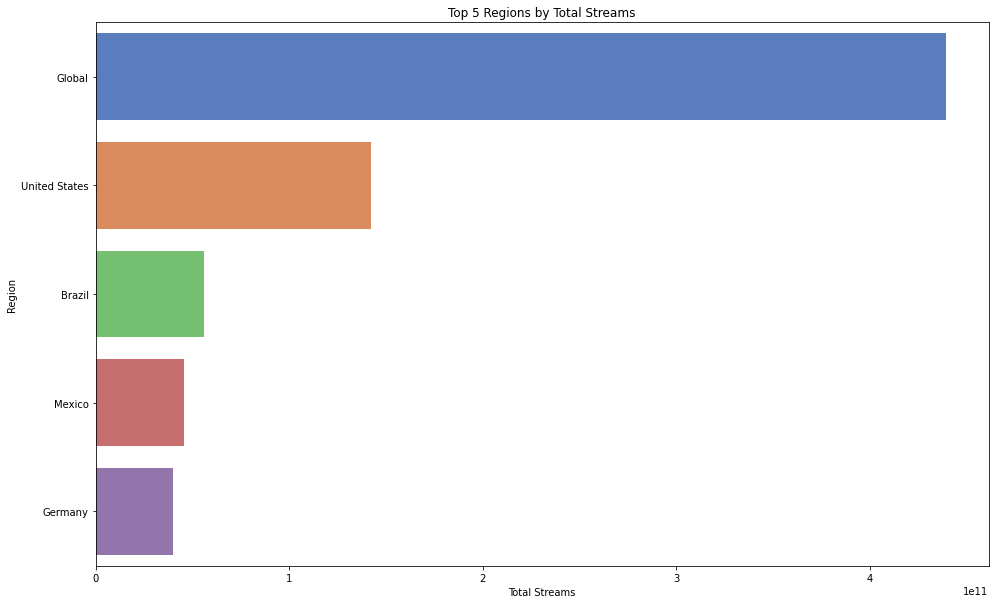

In [33]:
# Geospatial Analysis
region_streams_group = df.groupby('region')['streams'].sum().reset_index()
region_streams_group = region_streams_group.sort_values(by='streams', ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x='streams', y='region', data=region_streams_group.head(5), palette='muted', ci=None)
plt.title('Top 5 Regions by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Region')
plt.show()